## Why Air Quality for Babysitting?

Let's be honest, when you're babysitting you do not want to be breathing in bad air. Chasing kids that are running around *already* takes an Olympic marathoner level of endurance. Thus, it is going to be ideal to babysit in a neighborhood with a better air quality. This section is an analysis of the Air Quality of different neighborhoods in Pittsburgh using the [Allegheny County Air Quality](https://data.wprdc.org/dataset/allegheny-county-air-quality) dataset.

### Understanding the Dataset

In [211]:
import pandas as pd

airQuality = pd.read_csv("air-quality.csv")
airQuality.head()

,date,site,parameter,index_value,description,health_advisory,health_effects
0,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN


#### Uh, oh - which paramter?
After looking at the data, it is obvious each neighborhood has a couple of different ways of reporting Air Quality Data, so if we want to evaluate them against each other fairly we need to choose a paramter that most have in common and the is representative of the air quality. Luckily, this dataset uses and index value so instead of having to deal with the disparities between different sensors we can just look at the index value and compare accordingly.


## Counting the days by Good, Moderate, and Unhealthy
We will take the number of descriptions for each site and see what kind of distribution of Good to Moderate to Unhealthy Days are.

In [212]:
# get rid of unneccessary data
modified = airQuality[['site', 'description']]
modified = modified.groupby(["site", "description"]).size()
modified

site                   description                   
Avalon                 Good                              3518
                       Moderate                           545
                       Unhealthy for Sensitive Groups       2
Clairton               Good                               534
                       Moderate                            30
Flag Plaza             Good                              3999
                       Moderate                             3
Glassport High Street  Good                              2489
                       Moderate                            15
Harrison Township      Good                              4715
                       Moderate                           104
                       Unhealthy for Sensitive Groups       9
Lawrenceville          Good                              3372
                       Moderate                           660
                       Unhealthy for Sensitive Groups       5
Lawrenceville 2 

#### Getting rid of bad data
We see that West Mifflin hasn't reported a lot, so that would make the data inaccurate. Lets get rid of it.

In [213]:
modified = modified.drop(labels="West Mifflin")

In [214]:
# converting the series to dataframe
modified = modified.to_frame()
# formatting the indexes and columns
modified.index = modified.index.set_names(["sites", "description"])
modified.reset_index()

,sites,description,0
0,Avalon,Good,3518
1,Avalon,Moderate,545
2,Avalon,Unhealthy for Sensitive Groups,2
3,Clairton,Good,534
4,Clairton,Moderate,30
5,Flag Plaza,Good,3999
6,Flag Plaza,Moderate,3
7,Glassport High Street,Good,2489
8,Glassport High Street,Moderate,15
9,Harrison Township,Good,4715


#### Visualizing the table
We want to be able to compare the frequency of the different values to the others very easily so lets put the data above in a bar graph

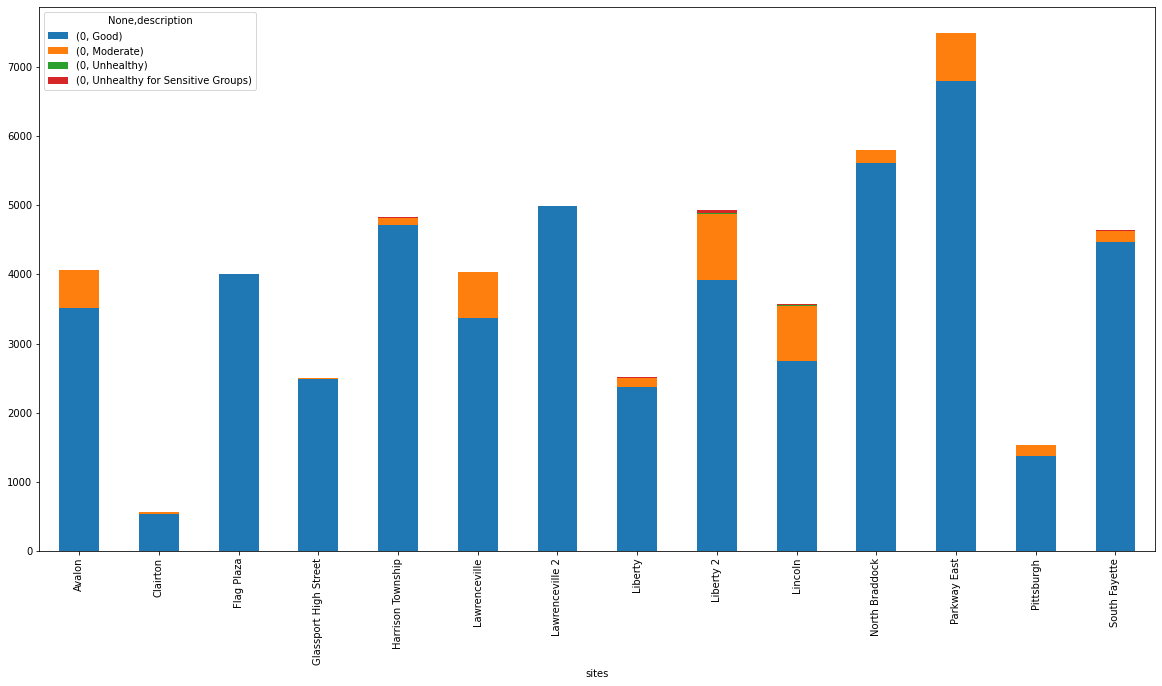

In [215]:
modified.unstack().plot(kind="bar", figsize=(20, 10), stacked=True, title="")

Now we can see fractionally how many Good to Moderate to Unhealthy days each site has!

## We want to see how the Air Quality fluctuates throughout the year for different neighborhoods...
First, let's get the average AQI for each day of the year, in every site.

In [216]:
# this data-set is HOURLY and lets us see how one site fluctuates over years of time
# our time is in the format "YYYY-MM-DDTHH:MM:SS", so we can use the strftime python function to group it

airQuality = airQuality.groupby([pd.to_datetime(airQuality['date']).dt.strftime('%m'), 'site'])

# now lets get the averages of all the days in the months over the years and group them
airQuality = airQuality['index_value'].mean().reset_index(name="Site_Month_Average")
airQuality

,date,site,Site_Month_Average
0,01,Avalon,22.259036
1,01,Clairton,2.375000
2,01,Flag Plaza,9.438889
3,01,Glassport High Street,13.331797
4,01,Harrison Township,20.519481
...,...,...,...
174,12,North Braddock,16.652605
175,12,Parkway East,22.817029
176,12,Pittsburgh,27.512821
177,12,South Fayette,13.912023


### Now lets plot it to see of the polution fluctuates for each site 
First we have to pivot the data so the date is the index.

In [217]:
airQuality = airQuality.pivot(index='date', columns='site', values="Site_Month_Average")

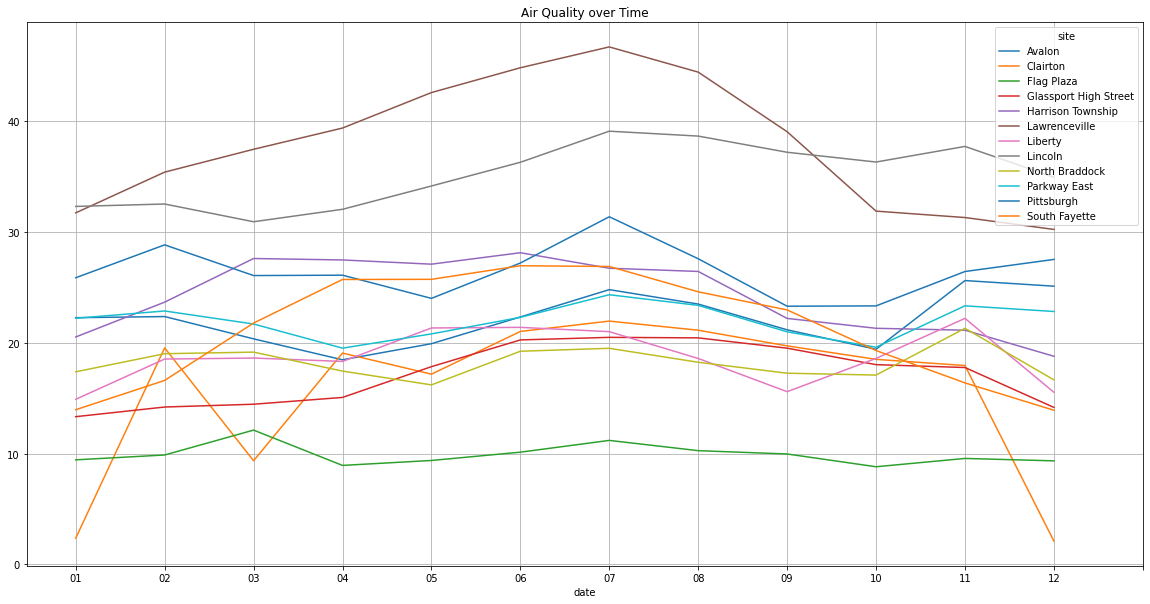

In [222]:
airQuality.plot(figsize=(20, 10), title="Air Quality over Time", legend=True, grid=True, 
                     xticks=[0, 1,2,3,4,5,6,7,8,9,10,11,12])


### Fixing issues with the data
   Soooo, we have a few duplicate sensors in some locations in the city. After some looking into the dataset, I've noticed that Lawerenceville 2, is not comparable to the rest of the sensors in the city. We will also drop Liberty 2 as well. 
Also, the "date" descriptor is not very informative to readers of the graph, so lets update that to "Month".

In [219]:
airQuality = airQuality.drop(columns=['Lawrenceville 2', 'Liberty 2', 'West Mifflin'])

## A nice plot!
Now we can see more robustly how AQI fluctuates over time for many Pittsburgh neighborhoods. Time to take this information into account with the other factors! 

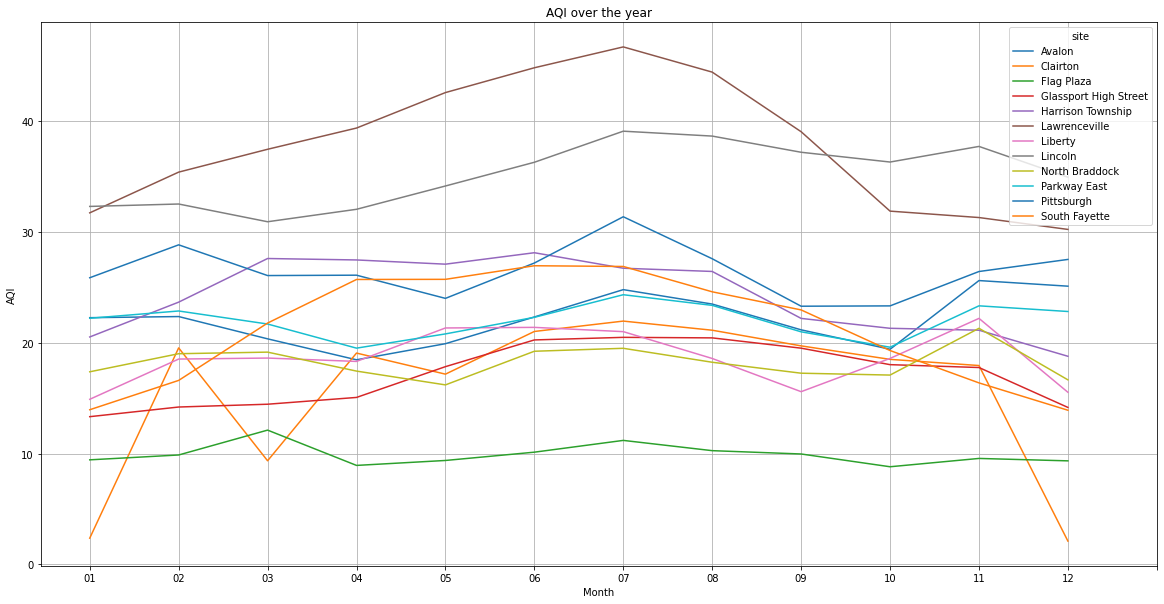

In [234]:
# line plot of the data, with labels added
airQuality.plot.line(figsize=(20, 10), title="AQI over the year", legend=True, grid=True, 
                     xticks=[0, 1,2,3,4,5,6,7,8,9,10,11,12], xlabel="Month", ylabel="AQI")

## What does this mean??
So the data isn't very interesting here... Most Pittsburgh neighborhood are following similar trajectories when it comes to AQI throughout the year. We know to avoid baby sitting in Lawrenceville which appears to always be way above average. Our overlapping cluster in the middle shows that there is not much differentiation in terms of AQI of the year, but if it comes down to a tie-breaker this factor could be used.